In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **AND Perceptron**

In [5]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 3.0
weight2 = 18.1
bias = 9


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

You got 3 wrong.  Keep trying!

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   9.0                    1           No
       0          1                  27.1                    1           No
       1          0                  12.0                    1           No
       1          1                  30.1                    1          Yes


## **NOT Perceptron**

In [6]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 9.0
weight2 = 7.0
bias = 18


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

You got 2 wrong.  Keep trying!

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  18.0                    1          Yes
       0          1                  25.0                    1           No
       1          0                  27.0                    1          Yes
       1          1                  34.0                    1           No


# Implementation of Perceptron Algorithum

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the dataset
filepath='/content/drive/MyDrive/Colab Notebooks/Deep Learning/perceptron data.csv'

data=pd.read_csv(filepath,header=None)

X=data.iloc[:, :-1].values
y=data.iloc[:, -1].values
data.head()


,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [11]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X, W) + b)[0])

def perceptronStep(X, y, W, b, learn_rate=0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y[i] - y_hat == 1:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate
        elif y[i] - y_hat == -1:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
    return W, b

def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2, 1))
    b = np.random.rand(1)[0] + x_max
    boundary_lines = []
    for i in range(num_epochs):
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0] / W[1], -b / W[1]))
    return boundary_lines


In [12]:
boundary_lines=trainPerceptronAlgorithm(X,y , learn_rate=0.01,num_epochs=25)

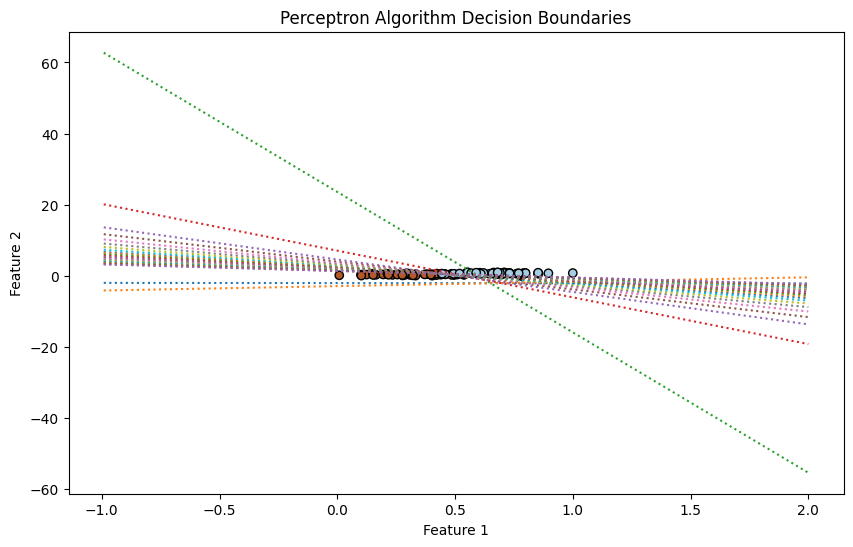

In [13]:
# Plotting function
def plot_boundary(X, y, boundary_lines):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    for W, b in boundary_lines:
        plt.plot([x_min, x_max], [W * x_min + b, W * x_max + b], linestyle='dotted')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Algorithm Decision Boundaries')
    plt.show()

# Plot the decision boundaries
plot_boundary(X, y, boundary_lines)


### Softmax Function

In [14]:
import numpy as np

def softmax(L):
  expL=np.exp(L)
  sumExpL=sum(expL)
  result=[]
  for i in expL:
    result.append(i*1.0/sumExpL)
  return result

# Note: The function np.divide can also be used here, as follows:
    # def softmax(L):
    #     expL = np.exp(L)
    #     return np.divide (expL, expL.sum())

## Cross-entropy Formula

In [15]:
import numpy as np

def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))